# ROI detection on text images

## Goal
The goal of this task is to detect interested regions of interests (ROIs) in images (printed text or written text). The ROIs will be provided for annotation classification (annotated or non-annotated image).

## Approachs
Steps to finish the ROIs detection:
1. Load an image into memory
2. Perform Image processing, e.g., grayscale
3. Configure an OCR Engine (e.g., Tesseract)
4. Apply the OCR Engine on the image to obtain a list of detection
5. Run the ROIs algorithm to obtain a list of refined ROIs (bounding box location, x,y,width,height)
6. Plot the bounding box and save the boxes into a corresponding txt file.

Several classes are needed in this work:
- Utils.py
- OCREngine.py
- ImgProcessor.py
- Plot.py

## Package configuration
- Python3.6
- Tessearct 3.05, instructions:
    - a. overall: https://lucacerone.net/2017/install-tesseract-3-0-5-in-ubuntu-16-04/
    - b. download the english language package, tesseract-ocr-3.02.eng.tar.gz, and put them into /usr/local/share/tessdata
        - https://github.com/tesseract-ocr/tesseract/wiki/Data-Files#cube-data-files-for-version-304305
- pyTesseract 0.2.0
- Ubuntu 14.04


In [1]:
%load_ext autoreload
%autoreload 2

from lib.ImgProcessor import ImgProcessor
import matplotlib.pyplot as plt
import numpy as np


# 1. Define the image
root_dir = './sample/positive'
fname = '30.png'
f = '%s/%s' % (root_dir,fname)


ModuleNotFoundError: No module named 'PIL'

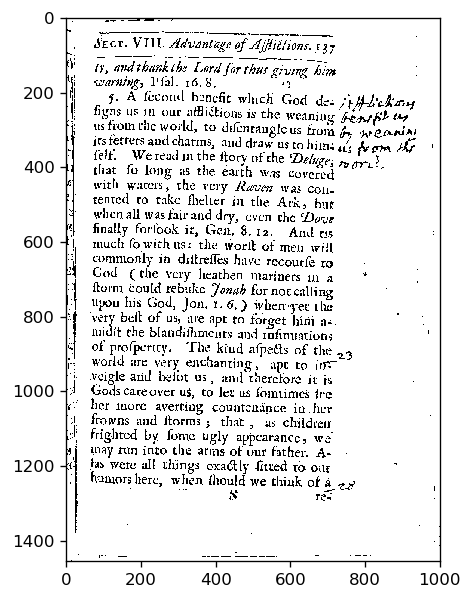

In [2]:
# 2. Load the image
imgProcessor = ImgProcessor()
img = imgProcessor.loadImage(inFilename=f)

# plot
plt.figure(figsize=(8, 6), dpi=120)
plt.imshow(img, cmap='gray')

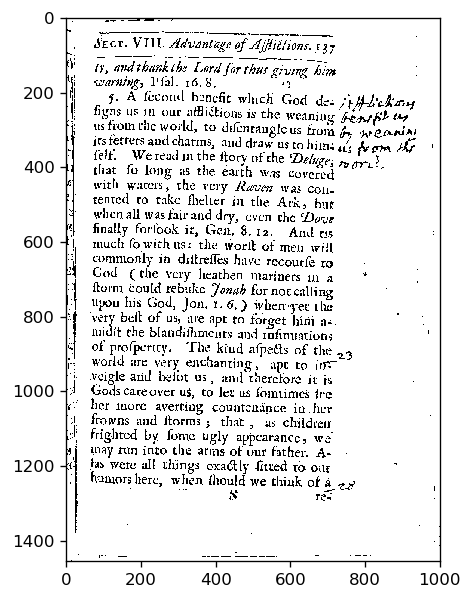

In [3]:
# 3. preprocess the image
img = imgProcessor.quickPreprocess(img)

# plot
plt.figure(figsize=(8, 6), dpi=120)
plt.imshow(img, cmap='gray')

In [16]:
#4. Load the tessearct engine
from lib.OCREngine import OCREngine

# define engine
ocr = OCREngine('tesseract')

# perform ocr
data = ocr.tess_image_to_data(img)
print(data)


level	page_num	block_num	par_num	line_num	word_num	left	top	width	height	conf	text
1	1	0	0	0	0	0	0	1000	1456	-1	
2	1	1	0	0	0	105	0	146	14	-1	
3	1	1	1	0	0	105	0	146	14	-1	
4	1	1	1	1	0	105	0	146	14	-1	
5	1	1	1	1	1	105	0	146	14	58	r.%_---Er.-.
2	1	2	0	0	0	257	36	77	7	-1	
3	1	2	1	0	0	257	36	77	7	-1	
4	1	2	1	1	0	257	36	77	7	-1	
5	1	2	1	1	1	257	36	77	7	70	_-----.
2	1	3	0	0	0	87	39	162	7	-1	
3	1	3	1	0	0	87	39	162	7	-1	
4	1	3	1	1	0	87	39	162	7	-1	
5	1	3	1	1	1	87	39	162	7	95	 
2	1	4	0	0	0	335	41	147	8	-1	
3	1	4	1	0	0	335	41	147	8	-1	
4	1	4	1	1	0	335	41	147	8	-1	
5	1	4	1	1	1	335	41	147	8	95	 
2	1	5	0	0	0	21	48	699	53	-1	
3	1	5	1	0	0	21	48	699	53	-1	
4	1	5	1	1	0	21	48	699	53	-1	
5	1	5	1	1	1	21	53	2	32	65	i
5	1	5	1	1	2	75	48	37	36	60	it
5	1	5	1	1	3	118	64	46	17	89	cr.
5	1	5	1	1	4	178	53	85	29	92	VIII.
5	1	5	1	1	5	275	55	166	40	56	Ad'lotmrage
5	1	5	1	1	6	452	57	203	39	45	ofylgtterums,
5	1	5	1	1	7	667	73	11	24	90	I
5	1	5	1	1	8	686	72	13	27	82	3
5	1	5	1	1	9	705	74	15	27	90	7
2	1	6	0	0	0	74	118	862	20

In [ ]:
from ImageROI import ImageROI

# Load the bounding 